# Libraries

In [ ]:
!pip install beautifulsoup4


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from bs4 import BeautifulSoup
import re
from hazm import Normalizer
from hazm import word_tokenize
import numpy as np

import sklearn 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

# Load data

In [ ]:
df = pd.read_csv('tasnim.csv',encoding='UTF-8')
# Take a random sample of 2000 records from the DataFrame
sample_df = df.sample(n=2000, random_state=42)
sample_df.head()

,category,title,abstract,body,time
45731,اقتصادی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی (فدرال رزرو) آمریکا...,به گزارش به نقل از راشاتودی، رؤسای منطقه‌ای ...,۰۶ مهر ۱۴۰۰ - ۱۲:۲۰
52281,بین الملل,خطیب زاده: برخی طرف‌های خارجی در صدد دامن زدن...,سخنگوی وزارت امور خارجه کشورمان با تأکید بر ا...,به گزارش گروه بین‌الملل ، سعید خطیب زاده سخنگ...,۱۶ دی ۱۴۰۰ - ۲۲:۵۴
1791,سیاسی,ولایتی: حاج قاسم مهم‌ترین سرداری بود که پرچم ...,مشاور مقام معظم رهبری در امور بین‌الملل گفت: ...,به گزارش گروه سیاسی ، علی‌اکبر ولایتی مشاور م...,۱۴ دی ۱۴۰۰ - ۱۵:۳۲
56668,رسانه ها,زمین سوخته,عصر کنونی را باید «عصر کرونا» نامید. اگر تا ق...,، علی دارابی طی یادداشتی در روزنامه صبح نو نوش...,۱۴ ارديبهشت ۱۳۹۹ - ۰۹:۴۸
28373,فرهنگی هنری,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,بخشی از نویسندگان ما تحت تأثیر ادبیات جنگ در ...,به گزارش خبرنگار فرهنگی ، رهبر انقلاب به مناس...,۰۴ خرداد ۱۴۰۰ - ۰۹:۰۶


# Exploratory Analysis

In [ ]:
sample_df.describe()

,category,title,abstract,body,time
count,2000,2000,2000,1971,2000
unique,8,2000,2000,1905,1993
top,اجتماعی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی (فدرال رزرو) آمریکا...,انتهای پیام/,۲۰ آبان ۱۴۰۰ - ۱۰:۱۰
freq,268,1,1,25,2


In [ ]:
sample_df.isnull().sum()

category     0
title        0
abstract     0
body        29
time         0
dtype: int64

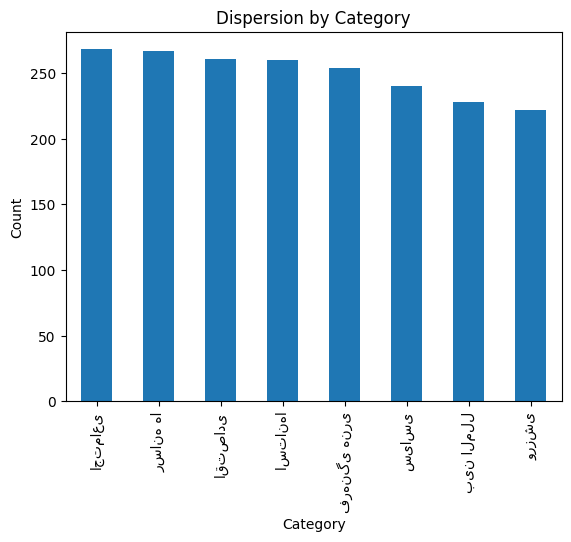

In [ ]:

# Check dispersion by category
category_counts = sample_df['category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Dispersion by Category')
plt.show()


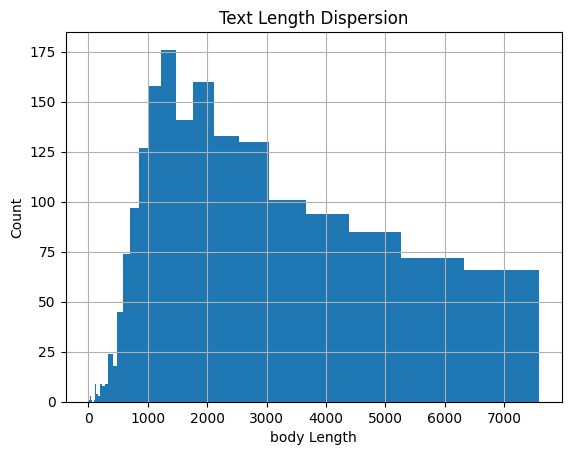

In [ ]:
# Check for null or NaN values in 'body' column
null_mask = sample_df['body'].isnull() | sample_df['body'].isna()

# Apply len() function only to non-null and non-NaN values
sample_df.loc[~null_mask, 'body length'] = sample_df.loc[~null_mask, 'body'].apply(len)

bins = 1.20**(np.arange(0,50))
# Check text length dispersion
sample_df['body length'].hist(bins=bins)
plt.xlabel('body Length')
plt.ylabel('Count')
plt.title('Text Length Dispersion')
plt.show()

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_19936\3932312861.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sample_df.loc[~null_mask, 'title length'] = sample_df.loc[~null_mask, 'title'].apply(len)


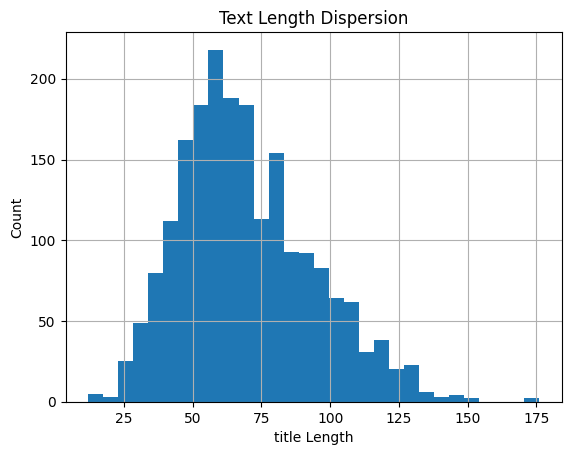

In [ ]:
# Check for null or NaN values in 'title' column
null_mask = sample_df['title'].isnull() | sample_df['title'].isna()

# Apply len() function only to non-null and non-NaN values
sample_df.loc[~null_mask, 'title length'] = sample_df.loc[~null_mask, 'title'].apply(len)

# Check text length dispersion
sample_df['title length'].hist(bins=30)
plt.xlabel('title Length')
plt.ylabel('Count')
plt.title('Text Length Dispersion')
plt.show()

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_19936\1159604052.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sample_df.loc[~null_mask, 'abstract length'] = sample_df.loc[~null_mask, 'abstract'].apply(len)


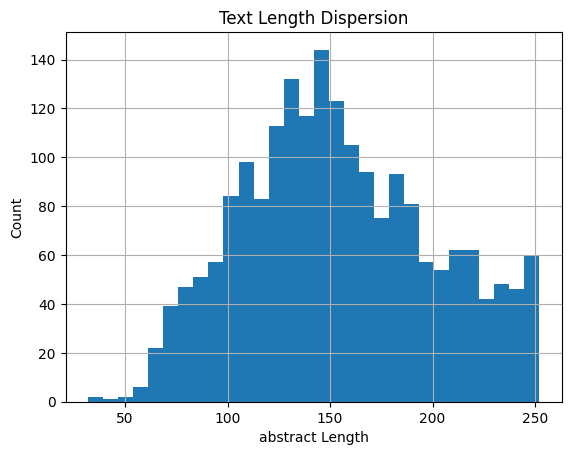

In [ ]:
# Check for null or NaN values in 'abstract' column
null_mask = sample_df['abstract'].isnull() | sample_df['abstract'].isna()

# Apply len() function only to non-null and non-NaN values
sample_df.loc[~null_mask, 'abstract length'] = sample_df.loc[~null_mask, 'abstract'].apply(len)

# Check text length dispersion
sample_df['abstract length'].hist(bins=30)
plt.xlabel('abstract Length')
plt.ylabel('Count')
plt.title('Text Length Dispersion')
plt.show()

# Text Cleaning

In [ ]:
import pandas as pd
from hazm import Normalizer
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords

df1 = sample_df

# Initialize the normalizer
normalizer = Normalizer()


# Remove HTML tags from the text columns
df1['title'] = df1['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# Check for NaN or null values or non-numeric values in 'body' column and convert them to empty strings
df1['body'] = df1['body'].apply(lambda x: '' if pd.isnull(x) or (isinstance(x, str) and not x.isnumeric()) else x)
df1['body'] = df1['body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

df1['abstract'] = df1['abstract'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


# Normalize the text columns
df1['title'] = df1['title'].apply(normalizer.normalize)
df1['body'] = df1['body'].apply(normalizer.normalize)
df1['abstract'] = df1['abstract'].apply(normalizer.normalize)

# Remove punctuation and symbols from the text columns
translator = str.maketrans("", "", string.punctuation)
df1['title'] = df1['title'].apply(lambda x: x.translate(translator))
df1['body'] = df1['body'].apply(lambda x: x.translate(translator))
df1['abstract'] = df1['abstract'].apply(lambda x: x.translate(translator))

# Remove stop words from the text columns
with open('stopwords.txt',encoding="utf-8") as f:
    persian_stopwords = f.read().splitlines()


nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords=stopwords.words('english')+persian_stopwords
#remove the punctuations and stopwords
import string
def text_process(text):


    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in (all_stopwords)]

    return " ".join(text)

# Combine the text columns into one column
df1['combined_text'] = df1['title'] + ' ' + df1['body'] + ' ' + df1['abstract']

df1['text_new'] = df1['combined_text'].apply(text_process)
df1



c:\Users\alireza dehghan\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


[nltk_data] Downloading package stopwords to C:\Users\alireza
[nltk_data]     dehghan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,title,abstract,body,time,body length,title length,abstract length,combined_text,text_new
45731,اقتصادی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی فدرال رزرو آمریکا د...,,۰۶ مهر ۱۴۰۰ - ۱۲:۲۰,1763.0,67,234,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا معامل...
52281,بین الملل,خطیب زاده برخی طرف‌های خارجی در صدد دامن زدن ...,سخنگوی وزارت امور خارجه کشورمان با تأکید بر ا...,,۱۶ دی ۱۴۰۰ - ۲۲:۵۴,664.0,79,217,خطیب زاده برخی طرف‌های خارجی در صدد دامن زدن ...,خطیب زاده طرف‌های خارجی صدد دامن ناآرامی‌ها قز...
1791,سیاسی,ولایتی حاج قاسم مهم‌ترین سرداری بود که پرچم ا...,مشاور مقام معظم رهبری در امور بین‌الملل گفت ح...,,۱۴ دی ۱۴۰۰ - ۱۵:۳۲,2429.0,70,156,ولایتی حاج قاسم مهم‌ترین سرداری بود که پرچم ا...,ولایتی حاج قاسم مهم‌ترین سرداری پرچم احیای اسل...
56668,رسانه ها,زمین سوخته,عصر کنونی را باید «عصر کرونا» نامید اگر تا قب...,,۱۴ ارديبهشت ۱۳۹۹ - ۰۹:۴۸,3491.0,12,165,زمین سوخته عصر کنونی را باید «عصر کرونا» ن...,زمین سوخته عصر «عصر کرونا» نامید شیوع ویروس جه...
28373,فرهنگی هنری,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,بخشی از نویسندگان ما تحت تأثیر ادبیات جنگ در ...,,۰۴ خرداد ۱۴۰۰ - ۰۹:۰۶,2619.0,81,133,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,روایت سنگری تأثیر منفی کتاب اروپایی نویسندگان ...
...,...,...,...,...,...,...,...,...,...,...
3288,سیاسی,برگزاری مراسم عزاداری روز رحلت پیامبر و شهادت...,مراسم عزاداری روز رحلت حضرت پیامبر اکرم ص و ش...,,۱۳ مهر ۱۴۰۰ - ۱۱:۰۱,568.0,81,145,برگزاری مراسم عزاداری روز رحلت پیامبر و شهادت...,برگزاری مراسم عزاداری رحلت پیامبر شهادت امام ح...
7379,سیاسی,برطرف شدن معضل کارت‌های بازرگانی با تصویب قان...,رئیس مجلس با اشاره به اینکه قانون مبارزه با ق...,,۲۴ فروردين ۱۴۰۰ - ۱۰:۴۱,1627.0,76,166,برطرف شدن معضل کارت‌های بازرگانی با تصویب قان...,برطرف معضل کارت‌های بازرگانی تصویب قانون مبارز...
31697,فرهنگی هنری,روزشمار اربعین مداحی «به عشق اربعین» به سبک «...,امسال به دلیل شیوع کرونا و فراقی که برای زائر...,,۱۳ مهر ۱۳۹۹ - ۱۲:۱۵,629.0,61,143,روزشمار اربعین مداحی «به عشق اربعین» به سبک «...,روزشمار اربعین مداحی «به عشق اربعین» سبک «منم ...
25716,فرهنگی هنری,مسعود نقاش زاده دبیر چهلمین دوره جشنواره فیلم...,محمد خزاعی معاون وزیر فرهنگ و ارشاد اسلامی و ...,,۰۵ آبان ۱۴۰۰ - ۱۲:۱۷,1666.0,54,150,مسعود نقاش زاده دبیر چهلمین دوره جشنواره فیلم...,مسعود نقاش زاده دبیر چهلمین دوره جشنواره فیلم ...


# Word Cloud

In [ ]:
from __future__ import unicode_literals
from hazm import word_tokenize
from wordcloud_fa import WordCloudFa

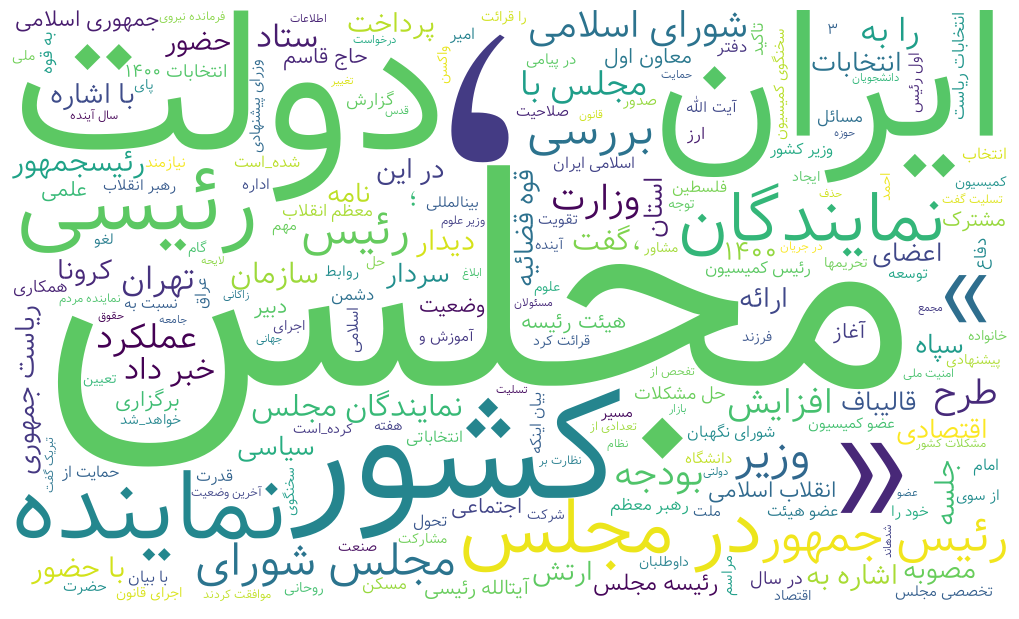

In [ ]:
# Filter the dataset for the first 1000 texts in the "سیاسی" category
political_texts = df1[df1['category'] == 'سیاسی'].head(1000)['combined_text']
# Combine the political texts into a single string
combined_text = ' '.join(political_texts)
political_wordcloud = WordCloudFa(width=1000, height=600,persian_normalize=True,background_color="white", stopwords=all_stopwords).generate(combined_text)
#political Words cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(political_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Vectorization

In [ ]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_vectorized= tfidf_vectorizer.fit_transform(sample_df['text_new'])
X_tfidf_vectorized.shape

(2000, 8755)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_count_vectorized = count_vectorizer.fit_transform(sample_df['text_new'])
feature_names = count_vectorizer.get_feature_names_out()

In [ ]:
tfidf_vectorizer.get_feature_names_out().shape

(8755,)

# Train and test split

In [ ]:
y = sample_df['category']
y

45731        اقتصادی
52281      بین الملل
1791           سیاسی
56668       رسانه ها
28373    فرهنگی هنری
            ...     
3288           سیاسی
7379           سیاسی
31697    فرهنگی هنری
25716    فرهنگی هنری
39659        اقتصادی
Name: category, Length: 2000, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vectorized, y, test_size=0.33, random_state=42)

In [ ]:
X_train1, X_test1, y_train, y_test = train_test_split(X_count_vectorized, y, test_size=0.33, random_state=42)

# Model Training

In [ ]:
#########################

In [ ]:
from sklearn.model_selection import train_test_split

# Split using TF-IDF vectorization
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_vectorized, y, test_size=0.33, random_state=42)

# Split using Count vectorization
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count_vectorized, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [ ]:
y_train = y_train.reset_index(drop=True)


kfold = KFold(n_splits=5)


results_tfidf = {}
results_count = {}

for model_name, model in models.items():
    scores_f1_tfidf = []
    scores_acc_tfidf = []
    scores_f1_count = []
    scores_acc_count = []
    
    for train_index, val_index in kfold.split(X_train_tfidf):
        # For TfidfVectorizer
        X_train_fold_tfidf, X_val_fold_tfidf = X_train_tfidf[train_index], X_train_tfidf[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model.fit(X_train_fold_tfidf, y_train_fold)
        y_pred_tfidf = model.predict(X_val_fold_tfidf)
        
        f1_tfidf = f1_score(y_val_fold, y_pred_tfidf, average='macro')
        acc_tfidf = accuracy_score(y_val_fold, y_pred_tfidf)
        
        scores_f1_tfidf.append(f1_tfidf)
        scores_acc_tfidf.append(acc_tfidf)
        
        # For CountVectorizer
        X_train_fold_count, X_val_fold_count = X_train_count[train_index], X_train_count[val_index]
        
        model.fit(X_train_fold_count, y_train_fold)
        y_pred_count = model.predict(X_val_fold_count)
        
        f1_count = f1_score(y_val_fold, y_pred_count, average='macro')
        acc_count = accuracy_score(y_val_fold, y_pred_count)
        
        scores_f1_count.append(f1_count)
        scores_acc_count.append(acc_count)
    
    avg_f1_tfidf = sum(scores_f1_tfidf) / len(scores_f1_tfidf)
    avg_acc_tfidf = sum(scores_acc_tfidf) / len(scores_acc_tfidf)
    
    avg_f1_count = sum(scores_f1_count) / len(scores_f1_count)
    avg_acc_count = sum(scores_acc_count) / len(scores_acc_count)
    
    results_tfidf[model_name] = {'F1 Score': avg_f1_tfidf, 'Accuracy': avg_acc_tfidf}
    results_count[model_name] = {'F1 Score': avg_f1_count, 'Accuracy': avg_acc_count}


In [ ]:
knn_results_tfidf = {}
knn_results_count = {}
# Hyperparameters for KNN
k_values = [3, 5, 7, 9, 11]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores_acc_tfidf = []
    scores_acc_count = []
    
    for train_index, val_index in kfold.split(X_train_tfidf):
        # For TfidfVectorizer
        X_train_fold_tfidf, X_val_fold_tfidf = X_train_tfidf[train_index], X_train_tfidf[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        knn.fit(X_train_fold_tfidf, y_train_fold)
        y_pred_tfidf = knn.predict(X_val_fold_tfidf)
        
        acc_tfidf = accuracy_score(y_val_fold, y_pred_tfidf)
        
        scores_acc_tfidf.append(acc_tfidf)
        
        # For CountVectorizer
        X_train_fold_count, X_val_fold_count = X_train_count[train_index], X_train_count[val_index]
        
        knn.fit(X_train_fold_count, y_train_fold)
        y_pred_count = knn.predict(X_val_fold_count)
        
        acc_count = accuracy_score(y_val_fold, y_pred_count)
        
        scores_acc_count.append(acc_count)
    
    avg_acc_tfidf = sum(scores_acc_tfidf) / len(scores_acc_tfidf)
    avg_acc_count = sum(scores_acc_count) / len(scores_acc_count)
    
    knn_results_tfidf[k] = avg_acc_tfidf
    knn_results_count[k] = avg_acc_count

best_k_tfidf = max(knn_results_tfidf, key=knn_results_tfidf.get)
best_k_count = max(knn_results_count, key=knn_results_count.get)

results_tfidf['KNN'] = {'F1 Score': knn_results_tfidf[best_k_tfidf], 'Accuracy': knn_results_tfidf[best_k_tfidf]}
results_count['KNN'] = {'F1 Score': knn_results_count[best_k_count], 'Accuracy': knn_results_count[best_k_count]}


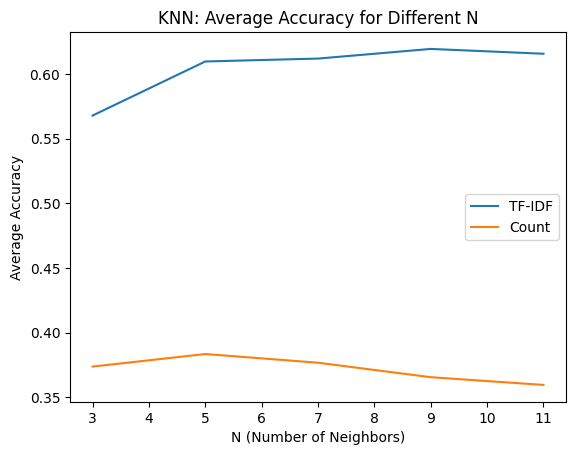

In [ ]:
plt.plot(k_values, list(knn_results_tfidf.values()), label='TF-IDF')
plt.plot(k_values, list(knn_results_count.values()), label='Count')
plt.xlabel('N (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title('KNN: Average Accuracy for Different N')
plt.legend()
plt.show()


In [ ]:
# Hyperparameter tuning for Logistic Regression
lr = LogisticRegression(solver='liblinear', max_iter=8000)
parameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(lr, parameters, scoring='accuracy', cv=kfold)

results_tfidf['Logistic Regression'] = {}
results_count['Logistic Regression'] = {}

# For TfidfVectorizer
lr_grid.fit(X_train_tfidf, y_train)
best_model_tfidf = lr_grid.best_estimator_
y_pred_tfidf = best_model_tfidf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
results_tfidf['Logistic Regression'] = {'F1 Score': f1_tfidf, 'Accuracy': acc_tfidf}

# For CountVectorizer
lr_grid.fit(X_train_count, y_train)
best_model_count = lr_grid.best_estimator_
y_pred_count = best_model_count.predict(X_test_count)
f1_count = f1_score(y_test, y_pred_count, average='macro')
acc_count = accuracy_score(y_test, y_pred_count)
results_count['Logistic Regression'] = {'F1 Score': f1_count, 'Accuracy': acc_count}

In [ ]:
best_model_tfidf = max(results_tfidf, key=lambda x: results_tfidf[x]['F1 Score'])
best_model_count = max(results_count, key=lambda x: results_count[x]['F1 Score'])
best_vectorization = max([results_tfidf, results_count], key=lambda x: x[best_model_tfidf]['F1 Score'])

print(f"Best Model (TF-IDF): {best_model_tfidf}")
print(f"Best Model (Count): {best_model_count}")
print(f"Best Vectorization: {'TF-IDF' if best_vectorization == results_tfidf else 'Count'}")


Best Model (TF-IDF): Logistic Regression
Best Model (Count): Logistic Regression
Best Vectorization: Count


In [ ]:
print('best results:', best_vectorization)

best results: {'SVM': {'F1 Score': 0.6849511565388562, 'Accuracy': 0.673134328358209}, 'Decision Tree': {'F1 Score': 0.5733248041186296, 'Accuracy': 0.5656716417910447}, 'Random Forest': {'F1 Score': 0.6832247225034356, 'Accuracy': 0.6761194029850747}, 'KNN': {'F1 Score': 0.38358208955223877, 'Accuracy': 0.38358208955223877}, 'Logistic Regression': {'F1 Score': 0.7682682978120805, 'Accuracy': 0.7651515151515151}}


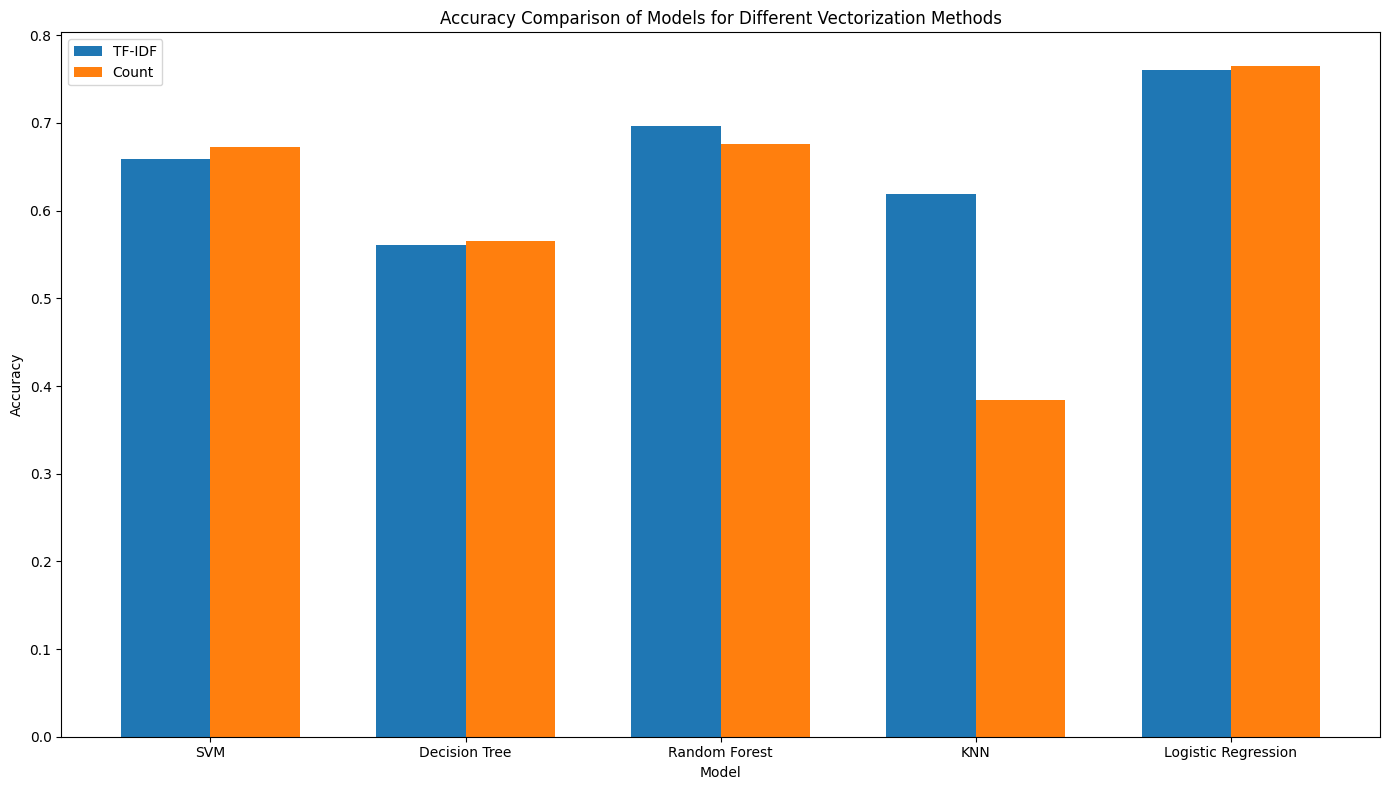

In [ ]:

model_names = list(results_tfidf.keys())
accuracy_tfidf = [results_tfidf[model]['Accuracy'] for model in model_names]
accuracy_count = [results_count[model]['Accuracy'] for model in model_names]

bar_width = 0.35  # Width of each bar
index = np.arange(len(model_names))  # Index for the x-axis

plt.figure(figsize=(14, 8))
plt.bar(index, accuracy_tfidf, width=bar_width, label='TF-IDF')
plt.bar(index + bar_width, accuracy_count, width=bar_width, label='Count')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models for Different Vectorization Methods')
plt.xticks(index + bar_width/2, model_names)  # Adjust x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


# Libraries

In [ ]:
#!pip install beautifulsoup4


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from bs4 import BeautifulSoup
import re
from hazm import Normalizer
from hazm import word_tokenize
import numpy as np

import sklearn 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

# Load data

In [ ]:
df = pd.read_csv('tasnim.csv',encoding='UTF-8')
# Take a random sample of 2000 records from the DataFrame
sample_df = df.sample(n=2000, random_state=42)
sample_df.head()

,category,title,abstract,body,time
45731,اقتصادی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی (فدرال رزرو) آمریکا...,به گزارش به نقل از راشاتودی، رؤسای منطقه‌ای ...,۰۶ مهر ۱۴۰۰ - ۱۲:۲۰
52281,بین الملل,خطیب زاده: برخی طرف‌های خارجی در صدد دامن زدن...,سخنگوی وزارت امور خارجه کشورمان با تأکید بر ا...,به گزارش گروه بین‌الملل ، سعید خطیب زاده سخنگ...,۱۶ دی ۱۴۰۰ - ۲۲:۵۴
1791,سیاسی,ولایتی: حاج قاسم مهم‌ترین سرداری بود که پرچم ...,مشاور مقام معظم رهبری در امور بین‌الملل گفت: ...,به گزارش گروه سیاسی ، علی‌اکبر ولایتی مشاور م...,۱۴ دی ۱۴۰۰ - ۱۵:۳۲
56668,رسانه ها,زمین سوخته,عصر کنونی را باید «عصر کرونا» نامید. اگر تا ق...,، علی دارابی طی یادداشتی در روزنامه صبح نو نوش...,۱۴ ارديبهشت ۱۳۹۹ - ۰۹:۴۸
28373,فرهنگی هنری,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,بخشی از نویسندگان ما تحت تأثیر ادبیات جنگ در ...,به گزارش خبرنگار فرهنگی ، رهبر انقلاب به مناس...,۰۴ خرداد ۱۴۰۰ - ۰۹:۰۶


# Exploratory Analysis

In [ ]:
sample_df.describe()

,category,title,abstract,body,time
count,2000,2000,2000,1971,2000
unique,8,2000,2000,1905,1993
top,اجتماعی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی (فدرال رزرو) آمریکا...,انتهای پیام/,۲۰ آبان ۱۴۰۰ - ۱۰:۱۰
freq,268,1,1,25,2


In [ ]:
sample_df.isnull().sum()

category     0
title        0
abstract     0
body        29
time         0
dtype: int64

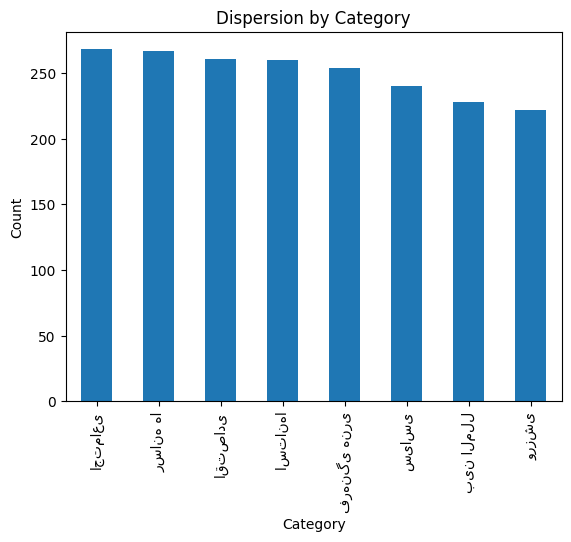

In [ ]:

# Check dispersion by category
category_counts = sample_df['category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Dispersion by Category')
plt.show()


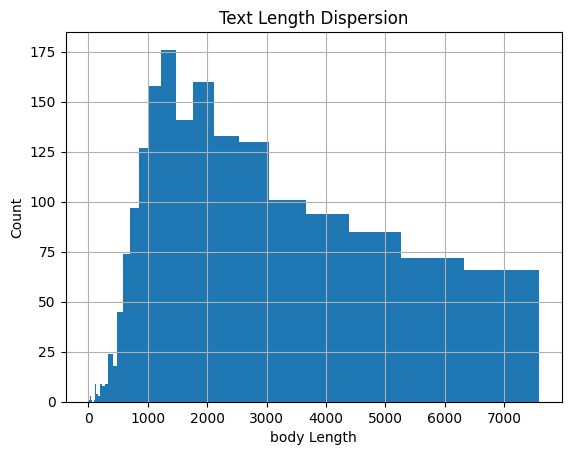

In [ ]:
# Check for null or NaN values in 'body' column
null_mask = sample_df['body'].isnull() | sample_df['body'].isna()

# Apply len() function only to non-null and non-NaN values
sample_df.loc[~null_mask, 'body length'] = sample_df.loc[~null_mask, 'body'].apply(len)

bins = 1.20**(np.arange(0,50))
# Check text length dispersion
sample_df['body length'].hist(bins=bins)
plt.xlabel('body Length')
plt.ylabel('Count')
plt.title('Text Length Dispersion')
plt.show()

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_11600\3932312861.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sample_df.loc[~null_mask, 'title length'] = sample_df.loc[~null_mask, 'title'].apply(len)


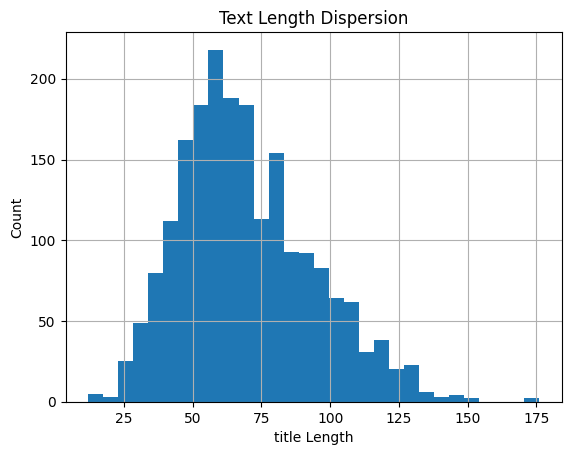

In [ ]:
# Check for null or NaN values in 'title' column
null_mask = sample_df['title'].isnull() | sample_df['title'].isna()

# Apply len() function only to non-null and non-NaN values
sample_df.loc[~null_mask, 'title length'] = sample_df.loc[~null_mask, 'title'].apply(len)

# Check text length dispersion
sample_df['title length'].hist(bins=30)
plt.xlabel('title Length')
plt.ylabel('Count')
plt.title('Text Length Dispersion')
plt.show()

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_11600\1159604052.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sample_df.loc[~null_mask, 'abstract length'] = sample_df.loc[~null_mask, 'abstract'].apply(len)


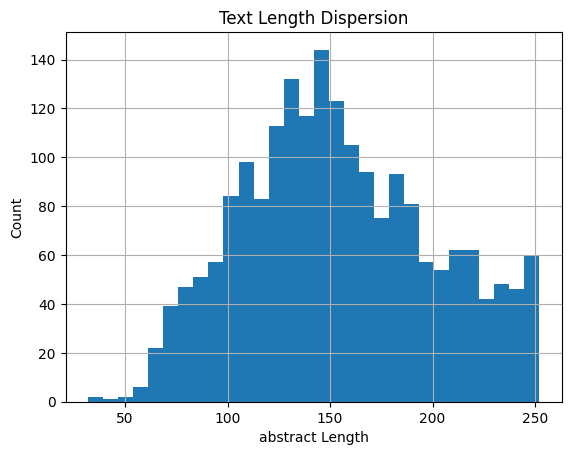

In [ ]:
# Check for null or NaN values in 'abstract' column
null_mask = sample_df['abstract'].isnull() | sample_df['abstract'].isna()

# Apply len() function only to non-null and non-NaN values
sample_df.loc[~null_mask, 'abstract length'] = sample_df.loc[~null_mask, 'abstract'].apply(len)

# Check text length dispersion
sample_df['abstract length'].hist(bins=30)
plt.xlabel('abstract Length')
plt.ylabel('Count')
plt.title('Text Length Dispersion')
plt.show()

# Text Cleaning

In [ ]:
import pandas as pd
from hazm import Normalizer
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords

df1 = sample_df

# Initialize the normalizer
normalizer = Normalizer()


# Remove HTML tags from the text columns
df1['title'] = df1['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# Check for NaN or null values or non-numeric values in 'body' column and convert them to empty strings
df1['body'] = df1['body'].apply(lambda x: '' if pd.isnull(x) or (isinstance(x, str) and not x.isnumeric()) else x)
df1['body'] = df1['body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

df1['abstract'] = df1['abstract'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


# Normalize the text columns
df1['title'] = df1['title'].apply(normalizer.normalize)
df1['body'] = df1['body'].apply(normalizer.normalize)
df1['abstract'] = df1['abstract'].apply(normalizer.normalize)

# Remove punctuation and symbols from the text columns
translator = str.maketrans("", "", string.punctuation)
df1['title'] = df1['title'].apply(lambda x: x.translate(translator))
df1['body'] = df1['body'].apply(lambda x: x.translate(translator))
df1['abstract'] = df1['abstract'].apply(lambda x: x.translate(translator))

# Remove stop words from the text columns
with open('stopwords.txt',encoding="utf-8") as f:
    persian_stopwords = f.read().splitlines()


nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords=stopwords.words('english')+persian_stopwords
#remove the punctuations and stopwords
import string
def text_process(text):


    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in (all_stopwords)]

    return " ".join(text)

# Combine the text columns into one column
df1['merged'] = df1['title'] + ' ' + df1['body'] + ' ' + df1['abstract']

def punctuation_removal(text):
    return re.sub(r'[\.\?\!\,\:\;\"\/\\]', '', text)

df1['text_new'] = df1['merged'].apply(text_process).apply(punctuation_removal)
df1



c:\Users\alireza dehghan\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


[nltk_data] Downloading package stopwords to C:\Users\alireza
[nltk_data]     dehghan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,title,abstract,body,time,body length,title length,abstract length,merged,text_new
45731,اقتصادی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی فدرال رزرو آمریکا د...,,۰۶ مهر ۱۴۰۰ - ۱۲:۲۰,1763.0,67,234,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا معامل...
52281,بین الملل,خطیب زاده برخی طرف‌های خارجی در صدد دامن زدن ...,سخنگوی وزارت امور خارجه کشورمان با تأکید بر ا...,,۱۶ دی ۱۴۰۰ - ۲۲:۵۴,664.0,79,217,خطیب زاده برخی طرف‌های خارجی در صدد دامن زدن ...,خطیب زاده طرف‌های خارجی صدد دامن ناآرامی‌ها قز...
1791,سیاسی,ولایتی حاج قاسم مهم‌ترین سرداری بود که پرچم ا...,مشاور مقام معظم رهبری در امور بین‌الملل گفت ح...,,۱۴ دی ۱۴۰۰ - ۱۵:۳۲,2429.0,70,156,ولایتی حاج قاسم مهم‌ترین سرداری بود که پرچم ا...,ولایتی حاج قاسم مهم‌ترین سرداری پرچم احیای اسل...
56668,رسانه ها,زمین سوخته,عصر کنونی را باید «عصر کرونا» نامید اگر تا قب...,,۱۴ ارديبهشت ۱۳۹۹ - ۰۹:۴۸,3491.0,12,165,زمین سوخته عصر کنونی را باید «عصر کرونا» ن...,زمین سوخته عصر «عصر کرونا» نامید شیوع ویروس جه...
28373,فرهنگی هنری,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,بخشی از نویسندگان ما تحت تأثیر ادبیات جنگ در ...,,۰۴ خرداد ۱۴۰۰ - ۰۹:۰۶,2619.0,81,133,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,روایت سنگری تأثیر منفی کتاب اروپایی نویسندگان ...
...,...,...,...,...,...,...,...,...,...,...
3288,سیاسی,برگزاری مراسم عزاداری روز رحلت پیامبر و شهادت...,مراسم عزاداری روز رحلت حضرت پیامبر اکرم ص و ش...,,۱۳ مهر ۱۴۰۰ - ۱۱:۰۱,568.0,81,145,برگزاری مراسم عزاداری روز رحلت پیامبر و شهادت...,برگزاری مراسم عزاداری رحلت پیامبر شهادت امام ح...
7379,سیاسی,برطرف شدن معضل کارت‌های بازرگانی با تصویب قان...,رئیس مجلس با اشاره به اینکه قانون مبارزه با ق...,,۲۴ فروردين ۱۴۰۰ - ۱۰:۴۱,1627.0,76,166,برطرف شدن معضل کارت‌های بازرگانی با تصویب قان...,برطرف معضل کارت‌های بازرگانی تصویب قانون مبارز...
31697,فرهنگی هنری,روزشمار اربعین مداحی «به عشق اربعین» به سبک «...,امسال به دلیل شیوع کرونا و فراقی که برای زائر...,,۱۳ مهر ۱۳۹۹ - ۱۲:۱۵,629.0,61,143,روزشمار اربعین مداحی «به عشق اربعین» به سبک «...,روزشمار اربعین مداحی «به عشق اربعین» سبک «منم ...
25716,فرهنگی هنری,مسعود نقاش زاده دبیر چهلمین دوره جشنواره فیلم...,محمد خزاعی معاون وزیر فرهنگ و ارشاد اسلامی و ...,,۰۵ آبان ۱۴۰۰ - ۱۲:۱۷,1666.0,54,150,مسعود نقاش زاده دبیر چهلمین دوره جشنواره فیلم...,مسعود نقاش زاده دبیر چهلمین دوره جشنواره فیلم ...


# Word Cloud

In [ ]:
from __future__ import unicode_literals
from hazm import word_tokenize
from wordcloud_fa import WordCloudFa

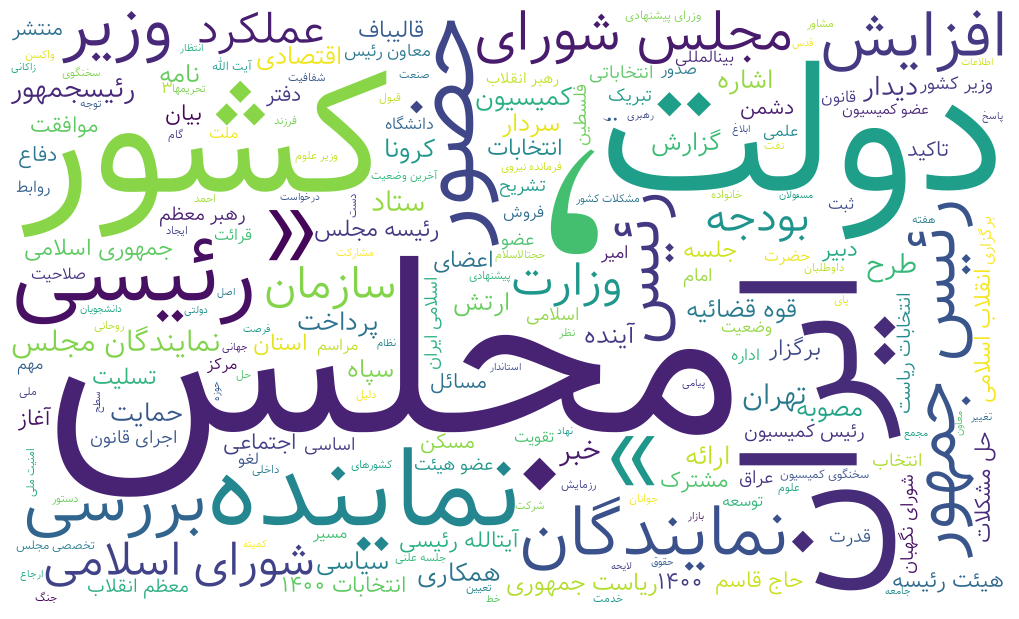

In [ ]:
# Filter the dataset for the first 1000 texts in the "سیاسی" category
political_texts = df1[df1['category'] == 'سیاسی'].head(10000)['text_new']
# Combine the political texts into a single string
combined_text = ' '.join(political_texts)
political_wordcloud = WordCloudFa(width=1000, height=600,persian_normalize=True,background_color="white", stopwords=all_stopwords).generate(combined_text)
#political Words cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(political_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Vectorization 

In [ ]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_vectorized= tfidf_vectorizer.fit_transform(sample_df['text_new'])
X_tfidf_vectorized.shape

(2000, 8755)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_count_vectorized = count_vectorizer.fit_transform(sample_df['text_new'])
feature_names = count_vectorizer.get_feature_names_out()

In [ ]:
tfidf_vectorizer.get_feature_names_out().shape

(8755,)

# Train and test split 

In [ ]:
y = sample_df['category']
y

45731        اقتصادی
52281      بین الملل
1791           سیاسی
56668       رسانه ها
28373    فرهنگی هنری
            ...     
3288           سیاسی
7379           سیاسی
31697    فرهنگی هنری
25716    فرهنگی هنری
39659        اقتصادی
Name: category, Length: 2000, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Split using TF-IDF vectorization
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_vectorized, y, test_size=0.33, random_state=42)

# Split using Count vectorization
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count_vectorized, y, test_size=0.33, random_state=42)


# Model Training

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
results_tfidf_test = {}
results_count_test = {}
results_tfidf_train = {}
results_count_train = {}

In [ ]:
#########################
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score

dt = DecisionTreeClassifier()

cv_scores_tfidf = cross_val_score(X=X_train_tfidf, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=dt)
cv_scores_count = cross_val_score(X=X_train_count, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=dt)

dt.fit(X_train_tfidf, y_train)
y_pred_tfidf = dt.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

dt.fit(X_train_count, y_train)
y_pred_count = dt.predict(X_test_count)
f1_count = f1_score(y_test, y_pred_count, average='macro')
acc_count = accuracy_score(y_test, y_pred_count)

results_tfidf_test['Decision Tree'] = {'F1 Score': f1_tfidf, 'Accuracy': acc_tfidf}
results_count_test['Decision Tree'] = {'F1 Score': f1_count, 'Accuracy': acc_count}
results_tfidf_train['Decision Tree'] = {'Accuracy': np.mean(cv_scores_tfidf)}
results_count_train['Decision Tree'] = {'Accuracy': np.mean(cv_scores_count)}


In [ ]:
#########################
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

cv_scores_tfidf = cross_val_score(X=X_train_tfidf, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=rf)
cv_scores_count = cross_val_score(X=X_train_count, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=rf)

rf.fit(X_train_tfidf, y_train)
y_pred_tfidf = rf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

rf.fit(X_train_count, y_train)
y_pred_count = rf.predict(X_test_count)
f1_count = f1_score(y_test, y_pred_count, average='macro')
acc_count = accuracy_score(y_test, y_pred_count)

results_tfidf_test['Random Forest'] = {'F1 Score': f1_tfidf, 'Accuracy': acc_tfidf}
results_count_test['Random Forest'] = {'F1 Score': f1_count, 'Accuracy': acc_count}
results_tfidf_train['Random Forest'] = {'Accuracy': np.mean(cv_scores_tfidf)}
results_count_train['Random Forest'] = {'Accuracy': np.mean(cv_scores_count)}

In [ ]:
#########################
# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC()

cv_scores_tfidf = cross_val_score(X=X_train_tfidf, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=svm)
cv_scores_count = cross_val_score(X=X_train_count, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=svm)

svm.fit(X_train_tfidf, y_train)
y_pred_tfidf = svm.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

svm.fit(X_train_count, y_train)
y_pred_count = svm.predict(X_test_count)
f1_count = f1_score(y_test, y_pred_count, average='macro')
acc_count = accuracy_score(y_test, y_pred_count)

results_tfidf_test['SVM'] = {'F1 Score': f1_tfidf, 'Accuracy': acc_tfidf}
results_count_test['SVM'] = {'F1 Score': f1_count, 'Accuracy': acc_count}
results_tfidf_train['SVM'] = {'Accuracy': np.mean(cv_scores_tfidf)}
results_count_train['SVM'] = {'Accuracy': np.mean(cv_scores_count)}


In [ ]:
#########################
# Loggistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=10000)

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True))
grid_search.fit(X_train_tfidf, y_train)

# Get the best logistic regression model from the grid search
best_lr = grid_search.best_estimator_

cv_scores_tfidf = cross_val_score(X=X_train_tfidf, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=best_lr)
cv_scores_count = cross_val_score(X=X_train_count, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=best_lr)

best_lr.fit(X_train_tfidf, y_train)
y_pred_tfidf = best_lr.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

best_lr.fit(X_train_count, y_train)
y_pred_count = best_lr.predict(X_test_count)
f1_count = f1_score(y_test, y_pred_count, average='macro')
acc_count = accuracy_score(y_test, y_pred_count)

results_tfidf_test['Logistic Regression'] = {'F1 Score': f1_tfidf, 'Accuracy': acc_tfidf}
results_count_test['Logistic Regression'] = {'F1 Score': f1_count, 'Accuracy': acc_count}
results_tfidf_train['Logistic Regression'] = {'Accuracy': np.mean(cv_scores_tfidf)}
results_count_train['Logistic Regression'] = {'Accuracy': np.mean(cv_scores_count)}


c:\Users\alireza dehghan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(results_tfidf_test)
print(results_count_test)
print(results_tfidf_train)
print(results_count_train)

{'Decision Tree': {'F1 Score': 0.5573170168346935, 'Accuracy': 0.5606060606060606}, 'Random Forest': {'F1 Score': 0.7324968361951121, 'Accuracy': 0.7303030303030303}, 'SVM': {'F1 Score': 0.7214851713044772, 'Accuracy': 0.706060606060606}, 'Logistic Regression': {'F1 Score': 0.7614757705440359, 'Accuracy': 0.7606060606060606}}
{'Decision Tree': {'F1 Score': 0.6445129743364619, 'Accuracy': 0.6409090909090909}, 'Random Forest': {'F1 Score': 0.7415149647955541, 'Accuracy': 0.7363636363636363}, 'SVM': {'F1 Score': 0.742040256361936, 'Accuracy': 0.7348484848484849}, 'Logistic Regression': {'F1 Score': 0.762957761465422, 'Accuracy': 0.7606060606060606}}
{'Decision Tree': {'Accuracy': 0.5716417910447762}, 'Random Forest': {'Accuracy': 0.6947761194029851}, 'SVM': {'Accuracy': 0.6716417910447761}, 'Logistic Regression': {'Accuracy': 0.7223880597014926}}
{'Decision Tree': {'Accuracy': 0.5865671641791044}, 'Random Forest': {'Accuracy': 0.6761194029850747}, 'SVM': {'Accuracy': 0.6880597014925373}, 

In [ ]:
#########################
# k-nearest neighbors

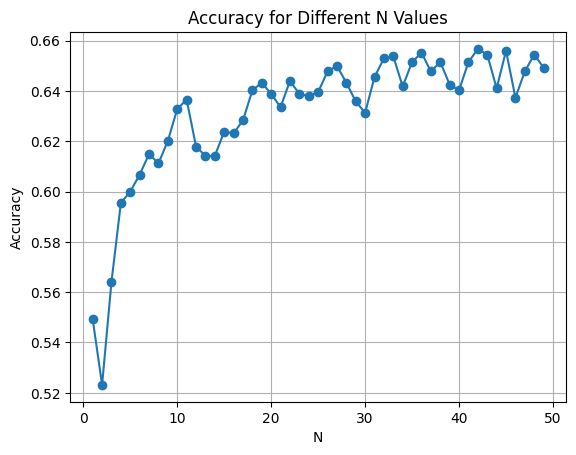

Best N: 42


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
np.random.seed(42) 

# Define a range of N values to try
n_values = range(1,50)


# Initialize lists to store the accuracy values
accuracy_values = []

# Iterate over different N values
for n in n_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n)

    # Cross-validation for TF-IDF features
    cv_scores_tfidf = cross_val_score(X=X_train_tfidf, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=knn)
    mean_cv_accuracy_tfidf = np.mean(cv_scores_tfidf)

    # Cross-validation for count features
    cv_scores_count = cross_val_score(X=X_train_count, y=y_train, cv=StratifiedKFold(n_splits=5, shuffle=True), estimator=knn)
    mean_cv_accuracy_count = np.mean(cv_scores_count)

    # Choose the maximum accuracy between TF-IDF and count features
    mean_cv_accuracy = max(mean_cv_accuracy_tfidf, mean_cv_accuracy_count)
    accuracy_values.append(mean_cv_accuracy)


# Plotting the accuracy for different N values
plt.plot(n_values, accuracy_values, marker='o')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different N Values')
plt.grid(True)
plt.show()

# Find the best N based on accuracy
best_n = n_values[np.argmax(accuracy_values)]
print("Best N:", best_n)

# Create KNN classifier with the best N
best_knn = KNeighborsClassifier(n_neighbors=best_n)

# Fit and predict using TF-IDF features
best_knn.fit(X_train_tfidf, y_train)
y_pred_tfidf = best_knn.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Fit and predict using count features
best_knn.fit(X_train_count, y_train)
y_pred_count = best_knn.predict(X_test_count)
f1_count = f1_score(y_test, y_pred_count, average='macro')
acc_count = accuracy_score(y_test, y_pred_count)

# Store the results for the best N
results_tfidf_test['KNN'] = {'F1 Score': f1_tfidf, 'Accuracy': acc_tfidf}
results_count_test['KNN'] = {'F1 Score': f1_count, 'Accuracy': acc_count}
results_tfidf_train['KNN'] = {'Accuracy': np.mean(cv_scores_tfidf)}
results_count_train['KNN'] = {'Accuracy': np.mean(cv_scores_count)}


In [ ]:
print(results_tfidf_test)
print(results_count_test)
print(results_tfidf_train)
print(results_count_train)

{'Decision Tree': {'F1 Score': 0.5573170168346935, 'Accuracy': 0.5606060606060606}, 'Random Forest': {'F1 Score': 0.7324968361951121, 'Accuracy': 0.7303030303030303}, 'SVM': {'F1 Score': 0.7214851713044772, 'Accuracy': 0.706060606060606}, 'Logistic Regression': {'F1 Score': 0.7614757705440359, 'Accuracy': 0.7606060606060606}, 'KNN': {'F1 Score': 0.6831056456532713, 'Accuracy': 0.6878787878787879}}
{'Decision Tree': {'F1 Score': 0.6445129743364619, 'Accuracy': 0.6409090909090909}, 'Random Forest': {'F1 Score': 0.7415149647955541, 'Accuracy': 0.7363636363636363}, 'SVM': {'F1 Score': 0.742040256361936, 'Accuracy': 0.7348484848484849}, 'Logistic Regression': {'F1 Score': 0.762957761465422, 'Accuracy': 0.7606060606060606}, 'KNN': {'F1 Score': 0.29186243274463813, 'Accuracy': 0.2863636363636364}}
{'Decision Tree': {'Accuracy': 0.5716417910447762}, 'Random Forest': {'Accuracy': 0.6947761194029851}, 'SVM': {'Accuracy': 0.6716417910447761}, 'Logistic Regression': {'Accuracy': 0.7223880597014926

In [ ]:
best_model_tfidf_test = max(results_tfidf_test, key=lambda x: results_tfidf_test[x]['F1 Score'])
best_model_count_test = max(results_count_test, key=lambda x: results_count_test[x]['F1 Score'])
best_vectorization_test = max([results_tfidf_test, results_count_test], key=lambda x: x[best_model_tfidf_test]['F1 Score'])

print(f"Best Model (TF-IDF): {best_model_tfidf_test}")
print(f"Best Model (Count): {best_model_count_test}")
print(f"Best Vectorization: {'TF-IDF' if best_vectorization_test == results_tfidf_test else 'Count'}")


Best Model (TF-IDF): Logistic Regression
Best Model (Count): Logistic Regression
Best Vectorization: Count


In [ ]:
print('best results for test:', best_vectorization_test)

best results for test: {'Decision Tree': {'F1 Score': 0.6445129743364619, 'Accuracy': 0.6409090909090909}, 'Random Forest': {'F1 Score': 0.7415149647955541, 'Accuracy': 0.7363636363636363}, 'SVM': {'F1 Score': 0.742040256361936, 'Accuracy': 0.7348484848484849}, 'Logistic Regression': {'F1 Score': 0.762957761465422, 'Accuracy': 0.7606060606060606}, 'KNN': {'F1 Score': 0.29186243274463813, 'Accuracy': 0.2863636363636364}}


In [ ]:
best_model_tfidf_train = max(results_tfidf_train, key=lambda x: results_tfidf_train[x]['Accuracy'])
best_model_count_train = max(results_count_train, key=lambda x: results_count_train[x]['Accuracy'])
best_vectorization_train = max([results_tfidf_train, results_count_train], key=lambda x: x[best_model_tfidf_train]['Accuracy'])

print(f"Best Model (TF-IDF): {best_model_tfidf_train}")
print(f"Best Model (Count): {best_model_count_train}")
print(f"Best Vectorization: {'TF-IDF' if best_vectorization_train == results_tfidf_train else 'Count'}")


Best Model (TF-IDF): Logistic Regression
Best Model (Count): Logistic Regression
Best Vectorization: TF-IDF


In [ ]:
print('best results for train:', best_vectorization_train)

best results for train: {'Decision Tree': {'Accuracy': 0.5716417910447762}, 'Random Forest': {'Accuracy': 0.6947761194029851}, 'SVM': {'Accuracy': 0.6716417910447761}, 'Logistic Regression': {'Accuracy': 0.7223880597014926}, 'KNN': {'Accuracy': 0.6492537313432836}}


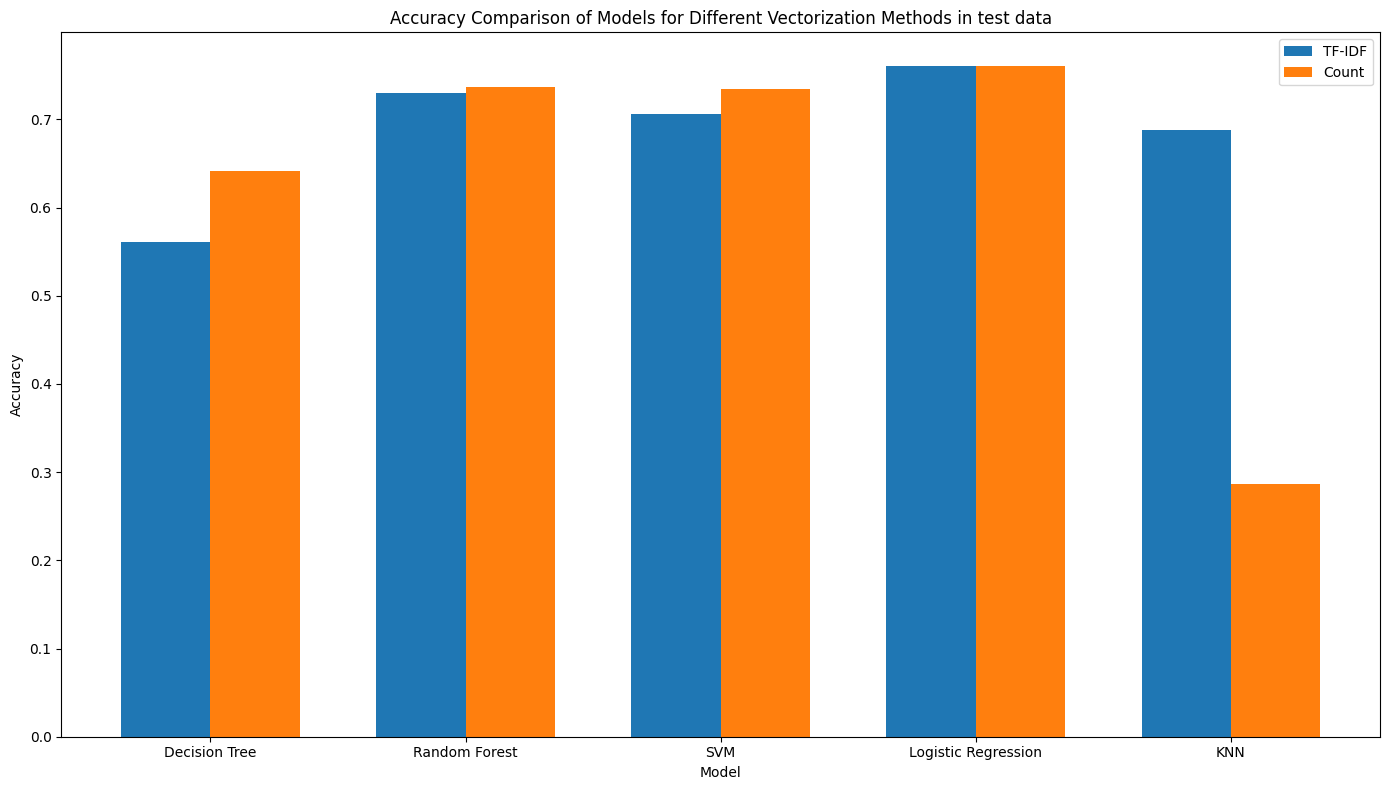

In [ ]:
model_names = list(results_tfidf_test.keys())
accuracy_tfidf = [results_tfidf_test[model]['Accuracy'] for model in model_names]
accuracy_count = [results_count_test[model]['Accuracy'] for model in model_names]

bar_width = 0.35  # Width of each bar
index = np.arange(len(model_names))  # Index for the x-axis

plt.figure(figsize=(14, 8))
plt.bar(index, accuracy_tfidf, width=bar_width, label='TF-IDF')
plt.bar(index + bar_width, accuracy_count, width=bar_width, label='Count')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models for Different Vectorization Methods in test data')
plt.xticks(index + bar_width/2, model_names)  # Adjust x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


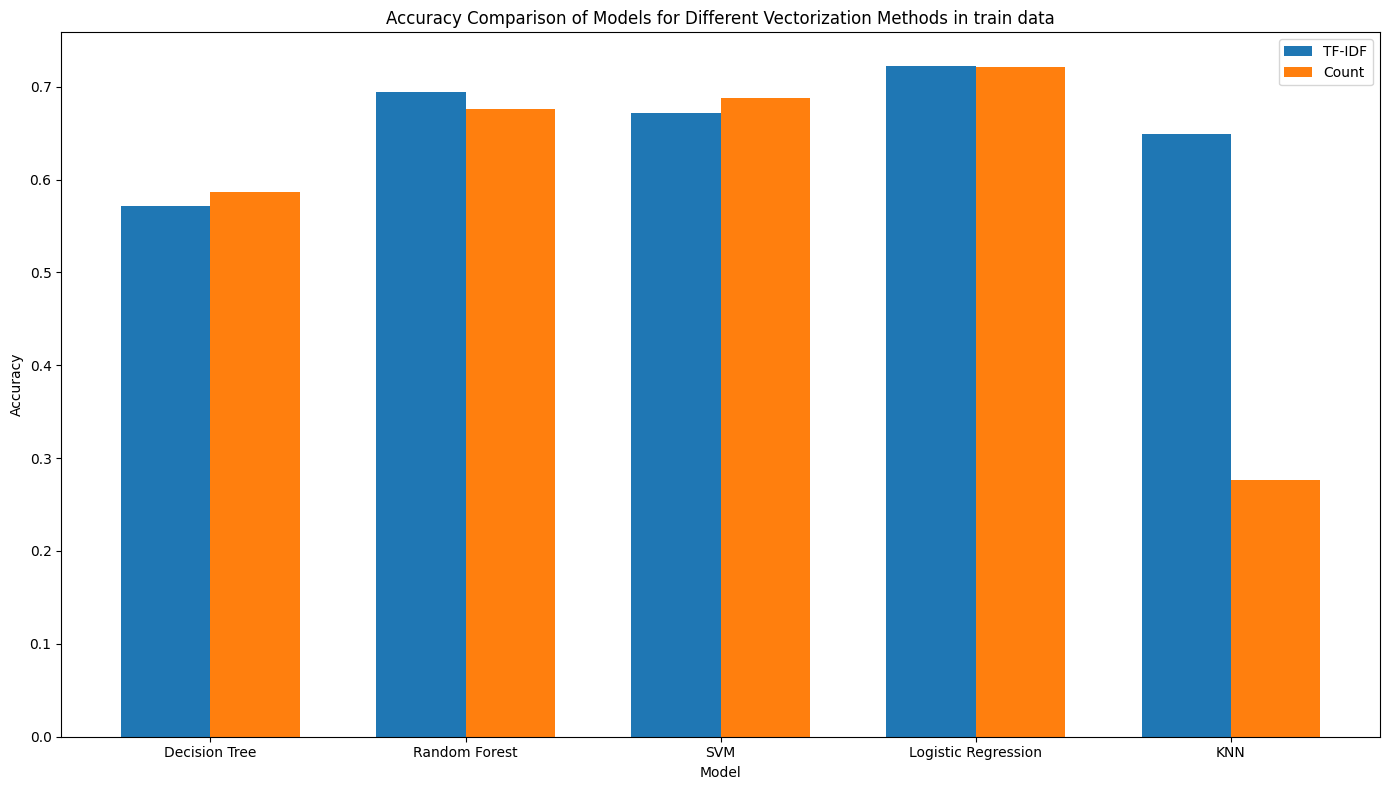

In [ ]:
model_names = list(results_tfidf_train.keys())
accuracy_tfidf = [results_tfidf_train[model]['Accuracy'] for model in model_names]
accuracy_count = [results_count_train[model]['Accuracy'] for model in model_names]

bar_width = 0.35  # Width of each bar
index = np.arange(len(model_names))  # Index for the x-axis

plt.figure(figsize=(14, 8))
plt.bar(index, accuracy_tfidf, width=bar_width, label='TF-IDF')
plt.bar(index + bar_width, accuracy_count, width=bar_width, label='Count')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models for Different Vectorization Methods in train data')
plt.xticks(index + bar_width/2, model_names)  # Adjust x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
'''
model_names = list(results_tfidf_train.keys())
accuracy_count_train = [results_count_train[model]['Accuracy'] for model in model_names]
accuracy_count_test = [results_count_test[model]['Accuracy'] for model in model_names]

bar_width = 0.35  # Width of each bar
index = np.arange(len(model_names))  # Index for the x-axis

plt.figure(figsize=(14, 8))
plt.bar(index, accuracy_count_test, width=bar_width, label='test')
plt.bar(index + bar_width, accuracy_count_train, width=bar_width, label='train')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Count Accuracy Comparison of Models for test and train data')
plt.xticks(index + bar_width/2, model_names)  # Adjust x-axis labels
plt.legend()
plt.tight_layout()
plt.show()
'''

In [ ]:
'''
model_names = list(results_tfidf_train.keys())
accuracy_tfidf_train = [results_tfidf_train[model]['Accuracy'] for model in model_names]
accuracy_tfidf_test = [results_tfidf_test[model]['Accuracy'] for model in model_names]

bar_width = 0.35  # Width of each bar
index = np.arange(len(model_names))  # Index for the x-axis

plt.figure(figsize=(14, 8))
plt.bar(index, accuracy_tfidf_test, width=bar_width, label='test')
plt.bar(index + bar_width, accuracy_tfidf_train, width=bar_width, label='train')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('TF-IDF Accuracy Comparison of Models for test and train data')
plt.xticks(index + bar_width/2, model_names)  # Adjust x-axis labels
plt.legend()
plt.tight_layout()
plt.show() 
'''
